## 1.加载数据，初步观察

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"telecom_users.csv")

In [3]:
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [4]:
df.shape

(5986, 22)

In [5]:
# 观察各特征的类型，是否有缺失值
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


各特征含义为：customerID：用户ID；
gender：性别（Female & Male）；
SeniorCitizen：老年用户（1表示是，0表示不是）；
Partner：伴侣用户（Yes or No）；
Dependents：亲属用户（Yes or No）；
tenure：在网时长（0-72月）；
PhoneService：是否开通电话服务业务（Yes or No）；
MultipleLines：是否开通了多线业务（Yes 、No or No phoneservice 三种）；
InternetService：是否开通互联网服务 （No, DSL数字网络，fiber optic光纤网络 三种）；
OnlineSecurity：是否开通网络安全服务（Yes，No，No internetserive 三种）；
OnlineBackup：是否开通在线备份业务（Yes，No，No internetserive 三种）；
DeviceProtection：是否开通了设备保护业务（Yes，No，No internetserive 三种）；
TechSupport：是否开通了技术支持服务（Yes，No，No internetserive 三种）；
StreamingTV：是否开通网络电视（Yes，No，No internetserive 三种）；
StreamingMovies：是否开通网络电影（Yes，No，No internetserive 三种）；
Contract：签订合同方式 （按月，一年，两年）；
PaperlessBilling：是否开通电子账单（Yes or No）；
PaymentMethod：付款方式（bank transfer，credit card，electronic check，mailed check）；
MonthlyCharges：月费用；
TotalCharges：总费用；
Churn：该用户是否流失（Yes or No）。

In [6]:
# 观察是否有重复值
df.customerID.duplicated().sum()

0

In [7]:
# 观察特征的取值情况
df.nunique()

Unnamed: 0          5986
customerID          5986
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1526
TotalCharges        5611
Churn                  2
dtype: int64

In [8]:
# 观察下各对象型特征的取值
print('gender : ', set(df['gender']))
print('Partner : ', set(df['Partner']))
print('Dependents : ', set(df['Dependents']))
print('PhoneService : ', set(df['PhoneService']))
print('MultipleLines : ', set(df['MultipleLines']))
print('InternetService : ', set(df['InternetService']))
print('OnlineSecurity : ', set(df['OnlineSecurity']))
print('OnlineBackup : ', set(df['OnlineBackup']))
print('DeviceProtection : ', set(df['DeviceProtection']))
print('TechSupport : ', set(df['TechSupport']))
print('StreamingTV : ', set(df['StreamingTV']))
print('StreamingMovies : ', set(df['StreamingMovies']))
print('Contract : ', set(df['Contract']))
print('PaperlessBilling : ', set(df['PaperlessBilling']))
print('PaymentMethod : ', set(df['PaymentMethod']))
print('Churn : ', set(df['Churn']))

gender :  {'Female', 'Male'}
Partner :  {'Yes', 'No'}
Dependents :  {'Yes', 'No'}
PhoneService :  {'Yes', 'No'}
MultipleLines :  {'No phone service', 'Yes', 'No'}
InternetService :  {'DSL', 'Fiber optic', 'No'}
OnlineSecurity :  {'No internet service', 'Yes', 'No'}
OnlineBackup :  {'No internet service', 'Yes', 'No'}
DeviceProtection :  {'No internet service', 'Yes', 'No'}
TechSupport :  {'No internet service', 'Yes', 'No'}
StreamingTV :  {'No internet service', 'Yes', 'No'}
StreamingMovies :  {'No internet service', 'Yes', 'No'}
Contract :  {'One year', 'Month-to-month', 'Two year'}
PaperlessBilling :  {'Yes', 'No'}
PaymentMethod :  {'Credit card (automatic)', 'Bank transfer (automatic)', 'Mailed check', 'Electronic check'}
Churn :  {'Yes', 'No'}


## 2.流失用户与非流失用户特征分析

### 2.1流失用户与非流失用户的个人信息对比

<AxesSubplot:xlabel='Dependents', ylabel='count'>

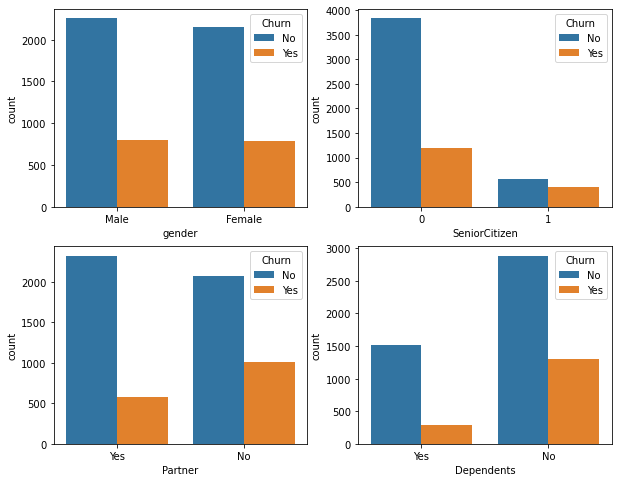

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
sns.countplot(x='gender', data=df, hue='Churn', ax=axes[0][0])
sns.countplot(x='SeniorCitizen', data=df, hue='Churn', ax=axes[0][1])
sns.countplot(x='Partner', data=df, hue='Churn', ax=axes[1][0])
sns.countplot(x='Dependents', data=df, hue='Churn', ax=axes[1][1])

### 2.2流失用户与非流失用户的服务订阅信息对比

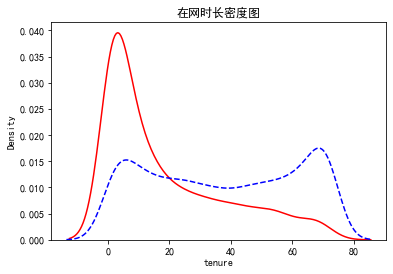

In [10]:
plt.rc('font', family='SimHei')
plt.title("在网时长密度图")
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['tenure'], color='r', linestyle='-', label='Churn:Yes')
ax1 = sns.kdeplot(df[df['Churn'] == 'No']['tenure'], color='b', linestyle='--', label='Churn:No')

<AxesSubplot:xlabel='StreamingMovies', ylabel='count'>

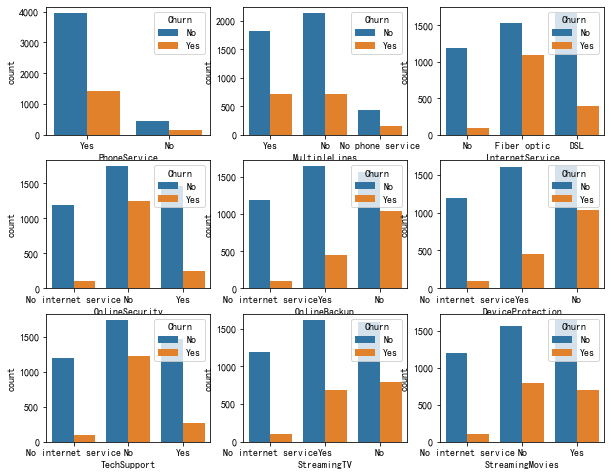

In [11]:
fig, axes = plt.subplots(3, 3, figsize=(10, 8))
sns.countplot(x='PhoneService', data=df, hue='Churn', ax=axes[0][0])
sns.countplot(x='MultipleLines', data=df, hue='Churn', ax=axes[0][1])
sns.countplot(x='InternetService', data=df, hue='Churn', ax=axes[0][2])
sns.countplot(x='OnlineSecurity', data=df, hue='Churn', ax=axes[1][0])
sns.countplot(x='OnlineBackup', data=df, hue='Churn', ax=axes[1][1])
sns.countplot(x='DeviceProtection', data=df, hue='Churn', ax=axes[1][2])
sns.countplot(x='TechSupport', data=df, hue='Churn', ax=axes[2][0])
sns.countplot(x='StreamingTV', data=df, hue='Churn', ax=axes[2][1])
sns.countplot(x='StreamingMovies', data=df, hue='Churn', ax=axes[2][2])

### 2.3流失用户与非流失用户帐单信息对比

<AxesSubplot:xlabel='PaperlessBilling', ylabel='count'>

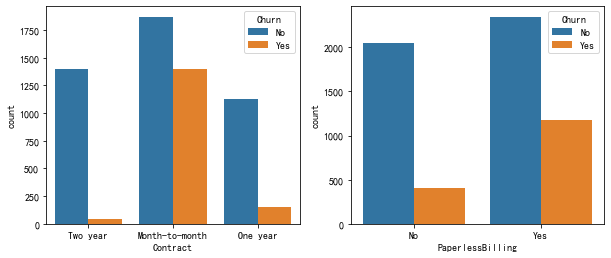

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.countplot(x='Contract', data=df, hue='Churn', ax=axes[0])
sns.countplot(x='PaperlessBilling', data=df, hue='Churn', ax=axes[1])

<AxesSubplot:xlabel='PaymentMethod', ylabel='count'>

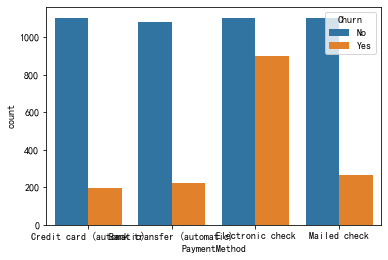

In [13]:
sns.countplot(x='PaymentMethod', data=df, hue='Churn')

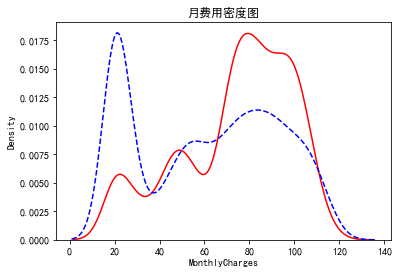

In [14]:
plt.title("月费用密度图")
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['MonthlyCharges'], color='r', linestyle='-', label='Churn:Yes')
ax1 = sns.kdeplot(df[df['Churn'] == 'No']['MonthlyCharges'], color='b', linestyle='--', label='Churn:No')

In [15]:
# 尝试转化为数值
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="raise")

ValueError: Unable to parse string " " at position 356

In [9]:
# 根据报错提示，观察下空格字符串的分布
df[df.TotalCharges == " "]

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
356,6754,2775-SEFEE,Male,0,No,Yes,0,Yes,Yes,DSL,...,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,,No
634,1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
2771,3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
3086,5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
3255,3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
4326,936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
5375,753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5382,4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5695,488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
5951,1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No


In [10]:
# 用0代替空字符串，重新尝试
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors="raise")

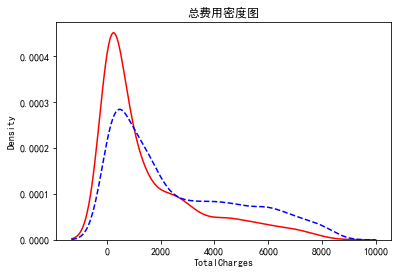

In [18]:
plt.title("总费用密度图")
ax1 = sns.kdeplot(df[df['Churn'] == 'Yes']['TotalCharges'], color='r', linestyle='-', label='Churn:Yes')
ax1 = sns.kdeplot(df[df['Churn'] == 'No']['TotalCharges'], color='b', linestyle='--', label='Churn:No')

## 3.分类预测

### 3.1 编码，提取特征

In [11]:
df_clu = df.drop(['Unnamed: 0', 'customerID', 'Churn'], axis=1)
labels = df['Churn']

In [12]:
# 二值对象型特征转换成数值型
df_clu['gender'] = df_clu['gender'].replace('Male', 1).replace('Female', 0)
df_clu['Partner'] = df_clu['Partner'].replace('Yes', 1).replace('No', 0)
df_clu['Dependents'] = df_clu['Dependents'].replace('Yes', 1).replace('No', 0)
df_clu['PhoneService'] = df_clu['PhoneService'].replace('Yes', 1).replace('No', 0)
df_clu['PaperlessBilling'] = df_clu['PaperlessBilling'].replace('Yes', 1).replace('No', 0)
labels = labels.replace('Yes', 1).replace('No', 0)

In [13]:
# 离散的，可用距离度量的对象型特征转化为数值型
df_clu['Contract'] = df_clu['Contract'].replace("Month-to-month", 1).replace("One year", 12).replace("Two year", 24)

In [14]:
# 离散的，不宜用距离度量的特征用one-hot编码
df_clu = pd.get_dummies(df_clu)
df_clu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   gender                                   5986 non-null   int64  
 1   SeniorCitizen                            5986 non-null   int64  
 2   Partner                                  5986 non-null   int64  
 3   Dependents                               5986 non-null   int64  
 4   tenure                                   5986 non-null   int64  
 5   PhoneService                             5986 non-null   int64  
 6   Contract                                 5986 non-null   int64  
 7   PaperlessBilling                         5986 non-null   int64  
 8   MonthlyCharges                           5986 non-null   float64
 9   TotalCharges                             5986 non-null   float64
 10  MultipleLines_No                         5986 no

In [15]:
df_clu.max()

gender                                        1.00
SeniorCitizen                                 1.00
Partner                                       1.00
Dependents                                    1.00
tenure                                       72.00
PhoneService                                  1.00
Contract                                     24.00
PaperlessBilling                              1.00
MonthlyCharges                              118.75
TotalCharges                               8684.80
MultipleLines_No                              1.00
MultipleLines_No phone service                1.00
MultipleLines_Yes                             1.00
InternetService_DSL                           1.00
InternetService_Fiber optic                   1.00
InternetService_No                            1.00
OnlineSecurity_No                             1.00
OnlineSecurity_No internet service            1.00
OnlineSecurity_Yes                            1.00
OnlineBackup_No                

In [16]:
# 数据归一化
df_clu['tenure'] = ( df_clu['tenure'] - df_clu['tenure'].min() )/( df_clu['tenure'].max() - df_clu['tenure'].min() )
df_clu['Contract'] = ( df_clu['Contract'] - df_clu['Contract'].min() )/( df_clu['Contract'].max() - df_clu['Contract'].min() )
df_clu['MonthlyCharges'] = ( df_clu['MonthlyCharges'] - df_clu['MonthlyCharges'].min() )/( df_clu['MonthlyCharges'].max() - df_clu['MonthlyCharges'].min() )
df_clu['TotalCharges'] = ( df_clu['TotalCharges'] - df_clu['TotalCharges'].min() )/( df_clu['TotalCharges'].max() - df_clu['TotalCharges'].min() )

### 3.2 保持法切分训练集和验证集 

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# 将数据集分成训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(df_clu, labels, test_size=0.3, random_state = 1026)

### 3.3 建模并验证 

In [26]:
# 多项式朴素贝叶斯模型
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7188195991091314
Area under the ROC curve:  0.7473279852645354
              precision    recall  f1-score   support

           0       0.91      0.69      0.78      1331
           1       0.47      0.81      0.60       465

    accuracy                           0.72      1796
   macro avg       0.69      0.75      0.69      1796
weighted avg       0.80      0.72      0.74      1796



In [27]:
# 高期朴素贝叶斯模型
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.6765033407572383
Area under the ROC curve:  0.7341694739988528
              precision    recall  f1-score   support

           0       0.92      0.61      0.74      1331
           1       0.44      0.85      0.58       465

    accuracy                           0.68      1796
   macro avg       0.68      0.73      0.66      1796
weighted avg       0.80      0.68      0.70      1796



In [28]:
# 逻辑回归模型
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', penalty='l1')
'''
solver：一个字符串，指定了求解最优化问题的算法，可以为如下的值:
'newton-cg'：使用牛顿法。
'lbfgs'：使用L-BFGS拟牛顿法。
'liblinear' ：使用 liblinear。
'sag'：使用 Stochastic Average Gradient descent 算法。
'''
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.8051224944320713
Area under the ROC curve:  0.7223011237407398
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1331
           1       0.64      0.55      0.59       465

    accuracy                           0.81      1796
   macro avg       0.75      0.72      0.73      1796
weighted avg       0.80      0.81      0.80      1796



In [29]:
# 决策树模型
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7293986636971047
Area under the ROC curve:  0.6600179346113764
              precision    recall  f1-score   support

           0       0.83      0.80      0.81      1331
           1       0.48      0.52      0.50       465

    accuracy                           0.73      1796
   macro avg       0.65      0.66      0.66      1796
weighted avg       0.74      0.73      0.73      1796



In [30]:
# 决策树模型给出的特征重要性
model.feature_importances_

array([0.02322879, 0.02063264, 0.02375014, 0.0152112 , 0.12230143,
       0.00388557, 0.17088786, 0.02066956, 0.19023171, 0.18830981,
       0.00897204, 0.0022027 , 0.00891221, 0.01600733, 0.01035745,
       0.        , 0.04292871, 0.        , 0.0018318 , 0.01291372,
       0.        , 0.00443179, 0.01089449, 0.        , 0.00773785,
       0.01677563, 0.        , 0.00582868, 0.00720027, 0.        ,
       0.00477926, 0.00449029, 0.        , 0.01037334, 0.00767814,
       0.00948928, 0.01720337, 0.00988292])

In [31]:
# 随机森林模型
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.8023385300668151
Area under the ROC curve:  0.6980352714023734
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1331
           1       0.66      0.48      0.56       465

    accuracy                           0.80      1796
   macro avg       0.75      0.70      0.72      1796
weighted avg       0.79      0.80      0.79      1796



In [32]:
# 随机森林模型给出的特征重要性
model.feature_importances_

array([3.01281451e-02, 2.01319042e-02, 2.14966801e-02, 1.82703990e-02,
       1.56482488e-01, 5.09500664e-03, 9.06267950e-02, 2.69458508e-02,
       1.45634808e-01, 1.49891439e-01, 1.54887028e-02, 4.17469097e-03,
       1.27669186e-02, 1.13964690e-02, 1.28625344e-02, 4.90233947e-05,
       4.38134607e-02, 4.16097712e-06, 8.35579689e-03, 2.28201926e-02,
       8.09411722e-05, 1.38272937e-02, 1.36945999e-02, 5.41931768e-03,
       1.03126814e-02, 2.58567729e-02, 8.60599246e-04, 9.59589488e-03,
       1.06878894e-02, 4.05060901e-04, 1.10655198e-02, 1.32985979e-02,
       9.77439731e-03, 8.49530637e-03, 1.34015060e-02, 1.46550703e-02,
       2.93619778e-02, 1.27711075e-02])

In [33]:
# 装袋决策树模型
from sklearn.ensemble import BaggingClassifier
model = BaggingClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7934298440979956
Area under the ROC curve:  0.6983212557459424
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1331
           1       0.63      0.50      0.56       465

    accuracy                           0.79      1796
   macro avg       0.73      0.70      0.71      1796
weighted avg       0.78      0.79      0.79      1796



In [34]:
# 极端随机树模型
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7639198218262806
Area under the ROC curve:  0.6581226824361988
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1331
           1       0.56      0.44      0.49       465

    accuracy                           0.76      1796
   macro avg       0.69      0.66      0.67      1796
weighted avg       0.75      0.76      0.75      1796



In [35]:
# 梯度提升树模型
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(n_estimators=10, random_state=1026)
model.fit(X_train, y_train)

predictions = model.predict(X_test)
print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7861915367483296
Area under the ROC curve:  0.6122827851966748
              precision    recall  f1-score   support

           0       0.79      0.97      0.87      1331
           1       0.76      0.25      0.38       465

    accuracy                           0.79      1796
   macro avg       0.78      0.61      0.62      1796
weighted avg       0.78      0.79      0.74      1796



In [37]:
# 多层全连接层神经网络模型-TensorFlow2框架下实现
import tensorflow as tf
import tensorflow.keras as keras

tf_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation='relu', input_shape=(38,), kernel_initializer='random_uniform'),
    tf.keras.layers.Dense(100, activation='relu', kernel_initializer='random_uniform'),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer='random_uniform')
])

In [38]:
batch_size = 100 # 每批训练样本数（批梯度下降法）
tf_epoch = 10
tf_model.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
tf_model.summary()
tf_model.fit(np.array(X_train), np.array(y_train), validation_data=(np.array(X_test), np.array(y_test)), batch_size=batch_size, epochs=tf_epoch, verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               3900      
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 14,101
Trainable params: 14,101
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
42/42 [==============================] - 1s 8ms/step - loss: 0.1990 - accuracy: 0.7270 - val_loss: 0.1560 - val_accuracy: 0.7411
Epoch 2/10
42/42 [==============================] - 0s 3ms/step - loss: 0.1518 - accuracy: 0.7637 - val_loss: 0.1431 - val_accuracy: 0.7951
Epoch 3/10
42/42 [==============================] - 0s 3ms/step - loss: 0.1447 - accuracy: 0.7955 - va

In [39]:
predictions = tf_model.predict(X_test)
predictions = list(np.round(predictions).reshape(-1,1)) # 四舍五入得到预测值

print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.8012249443207127
Area under the ROC curve:  0.7168730762705703
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1331
           1       0.64      0.54      0.59       465

    accuracy                           0.80      1796
   macro avg       0.74      0.72      0.73      1796
weighted avg       0.79      0.80      0.80      1796



In [18]:
# 多层全连接层神经网络模型-MindSpore框架下实现
import mindspore as ms
class ms_mode(ms.nn.Cell):
    def __init__(self):
        super(ms_mode, self).__init__()
        self.fc1 = ms.nn.Dense(38, 100)#, Uniform(), Zero(), True)
        self.fc2 = ms.nn.Dense(100, 100)#, Uniform(), Zero(), True)
        self.fc3 = ms.nn.Dense(100, 2)#, Uniform(), Zero(), True)
        self.relu = ms.nn.ReLU()
        self.sigmoid = ms.nn.Sigmoid()
        
    def construct(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.sigmoid(self.fc3(x))
        return x

net = ms_mode() # 实例化
net_loss = ms.nn.loss.MSELoss() # 定义损失函数
opt = ms.nn.Adam(params=net.trainable_params(), learning_rate=0.00005) # 定义优化方法
ms_model = ms.Model(net, net_loss, opt) # 将网络结构、损失函数和优化方法进行关联

In [19]:
y_train = np.array(y_train).astype(np.float32)

yy = []
for y in y_train: # 独热编码
    if y == 0:
        yy.append([0, 1])
    else:
        yy.append([1, 0])

yy = np.array(yy).astype(np.float32)

In [20]:
class DatasetGenerator:
    def __init__(self, X, y):
        self.data = X
        self.label = y

    def __getitem__(self, index):
        return self.data[index], self.label[index]

    def __len__(self):
        return len(self.data)

batch_size = 100 # 每批训练样本数
repeat_size = 1 # 样本重复次数

import mindspore.dataset as ds
dataset_generator = DatasetGenerator(np.array(X_train).astype(np.float32), yy)
ds_train = ds.GeneratorDataset(dataset_generator, ["data", "label"], shuffle=False)
ds_train = ds_train.batch(batch_size)
ds_train = ds_train.repeat(repeat_size)

from mindspore.train.callback import LossMonitor, TimeMonitor
loss_cb = LossMonitor(per_print_times=1)
time_cb = TimeMonitor(data_size=ds_train.get_dataset_size())

ms_epoch = 30
ms_model.train(ms_epoch, ds_train, dataset_sink_mode=False, callbacks=[loss_cb, time_cb])

epoch: 1 step: 1, loss is 0.24998989701271057
epoch: 1 step: 2, loss is 0.24997927248477936
epoch: 1 step: 3, loss is 0.2499714344739914
epoch: 1 step: 4, loss is 0.24995921552181244
epoch: 1 step: 5, loss is 0.24993862211704254
epoch: 1 step: 6, loss is 0.24991947412490845
epoch: 1 step: 7, loss is 0.24991901218891144
epoch: 1 step: 8, loss is 0.2499304711818695
epoch: 1 step: 9, loss is 0.24991942942142487
epoch: 1 step: 10, loss is 0.24986696243286133
epoch: 1 step: 11, loss is 0.24989216029644012
epoch: 1 step: 12, loss is 0.24985246360301971
epoch: 1 step: 13, loss is 0.2498648315668106
epoch: 1 step: 14, loss is 0.24982686340808868
epoch: 1 step: 15, loss is 0.24983596801757812
epoch: 1 step: 16, loss is 0.24982725083827972
epoch: 1 step: 17, loss is 0.2498241364955902
epoch: 1 step: 18, loss is 0.24979721009731293
epoch: 1 step: 19, loss is 0.2497122585773468
epoch: 1 step: 20, loss is 0.24975134432315826
epoch: 1 step: 21, loss is 0.24971435964107513
epoch: 1 step: 22, loss is 

epoch: 5 step: 6, loss is 0.21570894122123718
epoch: 5 step: 7, loss is 0.22121001780033112
epoch: 5 step: 8, loss is 0.22824735939502716
epoch: 5 step: 9, loss is 0.2275809645652771
epoch: 5 step: 10, loss is 0.21446822583675385
epoch: 5 step: 11, loss is 0.22427724301815033
epoch: 5 step: 12, loss is 0.21737471222877502
epoch: 5 step: 13, loss is 0.22333568334579468
epoch: 5 step: 14, loss is 0.2167636901140213
epoch: 5 step: 15, loss is 0.22127151489257812
epoch: 5 step: 16, loss is 0.22106730937957764
epoch: 5 step: 17, loss is 0.22281815111637115
epoch: 5 step: 18, loss is 0.22023990750312805
epoch: 5 step: 19, loss is 0.20691686868667603
epoch: 5 step: 20, loss is 0.21574050188064575
epoch: 5 step: 21, loss is 0.21220868825912476
epoch: 5 step: 22, loss is 0.22195598483085632
epoch: 5 step: 23, loss is 0.2141965627670288
epoch: 5 step: 24, loss is 0.21881762146949768
epoch: 5 step: 25, loss is 0.2188575565814972
epoch: 5 step: 26, loss is 0.21390140056610107
epoch: 5 step: 27, lo

epoch: 9 step: 10, loss is 0.1613244265317917
epoch: 9 step: 11, loss is 0.18715441226959229
epoch: 9 step: 12, loss is 0.16228541731834412
epoch: 9 step: 13, loss is 0.18340559303760529
epoch: 9 step: 14, loss is 0.16751916706562042
epoch: 9 step: 15, loss is 0.17910024523735046
epoch: 9 step: 16, loss is 0.17828477919101715
epoch: 9 step: 17, loss is 0.18290667235851288
epoch: 9 step: 18, loss is 0.17987707257270813
epoch: 9 step: 19, loss is 0.14773820340633392
epoch: 9 step: 20, loss is 0.17185349762439728
epoch: 9 step: 21, loss is 0.1680620163679123
epoch: 9 step: 22, loss is 0.18774673342704773
epoch: 9 step: 23, loss is 0.17463764548301697
epoch: 9 step: 24, loss is 0.18282413482666016
epoch: 9 step: 25, loss is 0.1819804310798645
epoch: 9 step: 26, loss is 0.16909420490264893
epoch: 9 step: 27, loss is 0.1836829036474228
epoch: 9 step: 28, loss is 0.16808657348155975
epoch: 9 step: 29, loss is 0.1951020210981369
epoch: 9 step: 30, loss is 0.1499902755022049
epoch: 9 step: 31, 

epoch: 13 step: 12, loss is 0.13925600051879883
epoch: 13 step: 13, loss is 0.1668357104063034
epoch: 13 step: 14, loss is 0.1541832685470581
epoch: 13 step: 15, loss is 0.1602582186460495
epoch: 13 step: 16, loss is 0.15744687616825104
epoch: 13 step: 17, loss is 0.1602897047996521
epoch: 13 step: 18, loss is 0.16500543057918549
epoch: 13 step: 19, loss is 0.13767747581005096
epoch: 13 step: 20, loss is 0.15930670499801636
epoch: 13 step: 21, loss is 0.1612556278705597
epoch: 13 step: 22, loss is 0.169006809592247
epoch: 13 step: 23, loss is 0.16555573046207428
epoch: 13 step: 24, loss is 0.16570022702217102
epoch: 13 step: 25, loss is 0.16376344859600067
epoch: 13 step: 26, loss is 0.15065337717533112
epoch: 13 step: 27, loss is 0.16487430036067963
epoch: 13 step: 28, loss is 0.15444155037403107
epoch: 13 step: 29, loss is 0.17552341520786285
epoch: 13 step: 30, loss is 0.12858010828495026
epoch: 13 step: 31, loss is 0.1646832525730133
epoch: 13 step: 32, loss is 0.13301898539066315


epoch: 17 step: 13, loss is 0.1634977012872696
epoch: 17 step: 14, loss is 0.15015237033367157
epoch: 17 step: 15, loss is 0.1538826823234558
epoch: 17 step: 16, loss is 0.15055441856384277
epoch: 17 step: 17, loss is 0.15196837484836578
epoch: 17 step: 18, loss is 0.16088896989822388
epoch: 17 step: 19, loss is 0.13576488196849823
epoch: 17 step: 20, loss is 0.15543942153453827
epoch: 17 step: 21, loss is 0.15950755774974823
epoch: 17 step: 22, loss is 0.16077443957328796
epoch: 17 step: 23, loss is 0.16361141204833984
epoch: 17 step: 24, loss is 0.15765263140201569
epoch: 17 step: 25, loss is 0.15474000573158264
epoch: 17 step: 26, loss is 0.14444614946842194
epoch: 17 step: 27, loss is 0.15880732238292694
epoch: 17 step: 28, loss is 0.15063555538654327
epoch: 17 step: 29, loss is 0.16899892687797546
epoch: 17 step: 30, loss is 0.120754674077034
epoch: 17 step: 31, loss is 0.15843431651592255
epoch: 17 step: 32, loss is 0.12674857676029205
epoch: 17 step: 33, loss is 0.13815508782863

epoch: 21 step: 14, loss is 0.14757795631885529
epoch: 21 step: 15, loss is 0.15095292031764984
epoch: 21 step: 16, loss is 0.14699918031692505
epoch: 21 step: 17, loss is 0.14859722554683685
epoch: 21 step: 18, loss is 0.16005903482437134
epoch: 21 step: 19, loss is 0.1350017786026001
epoch: 21 step: 20, loss is 0.1545535922050476
epoch: 21 step: 21, loss is 0.15925894677639008
epoch: 21 step: 22, loss is 0.1559761017560959
epoch: 21 step: 23, loss is 0.16379576921463013
epoch: 21 step: 24, loss is 0.1531997174024582
epoch: 21 step: 25, loss is 0.15046830475330353
epoch: 21 step: 26, loss is 0.1406613290309906
epoch: 21 step: 27, loss is 0.15607091784477234
epoch: 21 step: 28, loss is 0.14949649572372437
epoch: 21 step: 29, loss is 0.16597223281860352
epoch: 21 step: 30, loss is 0.11767410486936569
epoch: 21 step: 31, loss is 0.1544509381055832
epoch: 21 step: 32, loss is 0.12340585887432098
epoch: 21 step: 33, loss is 0.13278430700302124
epoch: 21 step: 34, loss is 0.1508318334817886

epoch: 25 step: 15, loss is 0.14845484495162964
epoch: 25 step: 16, loss is 0.14410358667373657
epoch: 25 step: 17, loss is 0.14591316878795624
epoch: 25 step: 18, loss is 0.1599981188774109
epoch: 25 step: 19, loss is 0.13468976318836212
epoch: 25 step: 20, loss is 0.15450826287269592
epoch: 25 step: 21, loss is 0.1589345484972
epoch: 25 step: 22, loss is 0.1521536260843277
epoch: 25 step: 23, loss is 0.1642915904521942
epoch: 25 step: 24, loss is 0.1497582495212555
epoch: 25 step: 25, loss is 0.14763787388801575
epoch: 25 step: 26, loss is 0.1379268765449524
epoch: 25 step: 27, loss is 0.1537434309720993
epoch: 25 step: 28, loss is 0.14898866415023804
epoch: 25 step: 29, loss is 0.16330882906913757
epoch: 25 step: 30, loss is 0.11602073907852173
epoch: 25 step: 31, loss is 0.1514316201210022
epoch: 25 step: 32, loss is 0.12101329863071442
epoch: 25 step: 33, loss is 0.12861578166484833
epoch: 25 step: 34, loss is 0.15087135136127472
epoch: 25 step: 35, loss is 0.16276627779006958
epo

epoch: 29 step: 15, loss is 0.14622968435287476
epoch: 29 step: 16, loss is 0.14187714457511902
epoch: 29 step: 17, loss is 0.1434285044670105
epoch: 29 step: 18, loss is 0.15999406576156616
epoch: 29 step: 19, loss is 0.1342799812555313
epoch: 29 step: 20, loss is 0.15488062798976898
epoch: 29 step: 21, loss is 0.158185675740242
epoch: 29 step: 22, loss is 0.14891047775745392
epoch: 29 step: 23, loss is 0.16497503221035004
epoch: 29 step: 24, loss is 0.14682379364967346
epoch: 29 step: 25, loss is 0.14582441747188568
epoch: 29 step: 26, loss is 0.1358383446931839
epoch: 29 step: 27, loss is 0.15185560286045074
epoch: 29 step: 28, loss is 0.1487170159816742
epoch: 29 step: 29, loss is 0.16105104982852936
epoch: 29 step: 30, loss is 0.1152224987745285
epoch: 29 step: 31, loss is 0.14906077086925507
epoch: 29 step: 32, loss is 0.11909566819667816
epoch: 29 step: 33, loss is 0.1252337396144867
epoch: 29 step: 34, loss is 0.1508825421333313
epoch: 29 step: 35, loss is 0.16018982231616974
e

In [22]:
X_test = np.array(X_test)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,TotalCharges,...,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5449,0,0,1,1,0.138889,1,0.000000,1,0.015423,0.022655,...,0,1,0,0,1,0,1,0,0,0
4443,1,0,0,1,0.430556,1,0.478261,1,0.608955,0.297957,...,0,0,1,0,0,1,0,0,0,1
5625,0,1,0,0,0.111111,1,0.000000,0,0.826866,0.089870,...,0,0,1,0,0,1,0,0,1,0
5292,0,0,0,0,0.736111,1,1.000000,0,0.004478,0.115800,...,0,1,0,0,1,0,0,0,0,1
4455,1,0,0,1,0.041667,1,0.000000,1,0.362687,0.019511,...,0,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4843,1,0,1,1,0.208333,1,0.478261,0,0.013930,0.038303,...,0,1,0,0,1,0,0,0,0,1
2648,1,0,1,0,0.555556,1,0.000000,1,0.784577,0.426832,...,0,0,1,0,0,1,1,0,0,0
4454,0,0,0,0,0.125000,1,0.000000,1,0.698010,0.090802,...,0,0,1,0,0,1,0,0,0,1
5108,0,0,1,1,0.319444,1,0.000000,1,0.567662,0.196078,...,1,0,0,1,0,0,0,1,0,0


In [28]:
# 预测
predictions = []
#xx = X_test.values
for i in range(len(X_test)):
    y_p = ms_model.predict(ms.Tensor([X_test[i]], ms.float32))
    predictions.append(y_p.asnumpy()[0][0]) # 直接取独热编码的第一个值

predictions = list(np.round(predictions).reshape(-1,1)) # 四舍五入得到预测值

print('Test set accuracy score: ', accuracy_score(y_test, predictions))
print('Area under the ROC curve: ', roc_auc_score(y_test, predictions))
print(classification_report(y_test, predictions))

Test set accuracy score:  0.7928730512249443
Area under the ROC curve:  0.686052204260682
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1331
           1       0.64      0.46      0.54       465

    accuracy                           0.79      1796
   macro avg       0.73      0.69      0.70      1796
weighted avg       0.78      0.79      0.78      1796

